``` 'Restart'누르고 'Run All'해서 오류 안 나야함 ``` 

## 회귀와 분류(Recap)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# 선형 분류

- 전처리 과정
``` 
너무 많으면 학습이 안됨
```

In [13]:
cancer = load_breast_cancer()
X, y = cancer['data'], cancer['target']
X.shape, y.shape

((569, 30), (569,))

- StandardScaler

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
X_train ,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #42: 임의의 고정 숫자
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [19]:
X_train ,X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) #위의 코드와 X만 다름
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

> 선형모델의 a가 0에 가까울 수록 특징(x)가 잘 발현되지 않음

### <선형모델>
1. Ridge(L2): 
    - ```일반화``` 성능에 관심이 있으면 L2를 선택하는 경향이 있음
    - 가중치를 거의 주지 않아서 일반화 보장 
    - 데이터가 많을 때 x값을 모아야 효과를 볼 수 있음
    - solver = lbfgs: 수학적 알고리즘
    - 0이 절대 나오면 안된다

2. Lasso(L1):
    - 주요한 특성을 스스로 고려하는 모델의 경우 -> ```모델을 해석```하는데 용이함(= ```주요특성 찾기```)
    - 기울기가 큰 의미가 없음 -> ```특성이 작은건 작은것끼리 모이고 큰것은 큰것끼리 모여서 주요특성을 찾을 수 있음```
    - 0이 나올 수 있음

- 'LogisticRegression'로 L1, L2규제를 안써도됨
    - penalty : default='l2'
    - solver : default='lbfgs' #웬만하면 이게 좋음
    - C : C를 이용해서 규제 강도를 결정
        - C가 커질수록 과접합에 가까워짐 
        - 데이터가 너무 많으면 C값을 줄여라

- 'Logistic...': 확률관련이다

In [ ]:
# models = {
#     'OLS': LogisticRegression(penalty=None, max_iter=5000), #일반적인 선형모델
#     'Ridge(L2)': LogisticRegression(penalty='l2', solver='lbfgs', max_iter=5000),
#     'Lasso(L1)': LogisticRegression(penalty='l1', solver='liblinear',max_iter=5000)
# }

In [ ]:
# LogisticRegression -> C를 이용해서 규제 강도를 결정
# 작은 < 1.0 < 큰 거
# 강한 규제 < 일반 규제 < 규제 해제
lr = LogisticRegression(max_iter=5000) #C를 결정하세요
lr.fit(X_train, y_train)

In [21]:
result = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_prob)
    result[name] =auc

In [22]:
result

{'OLS': np.float64(0.9823124795283328),
 'Ridge(L2)': np.float64(0.99737962659679),
 'Lasso(L1)': np.float64(0.9963969865705864)}

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)# 보통 3으로 잡음
knn.fit(X_train, y_train) # knn학습

In [6]:
y_pred = knn.predict(X_test) #ㅇㅖ측값
print(knn.score(X_test, y_test)) # 학습 데이터
print(np.mean(y_pred == y_test)) # 예측 데이터
#학습데이터 == 예측데이터: 과대적합

0.10759585116572867
0.0026647286821705426


``` KNeighborsClassifier(n_neighbors=3) 시각화 ```

In [28]:
import mglearn

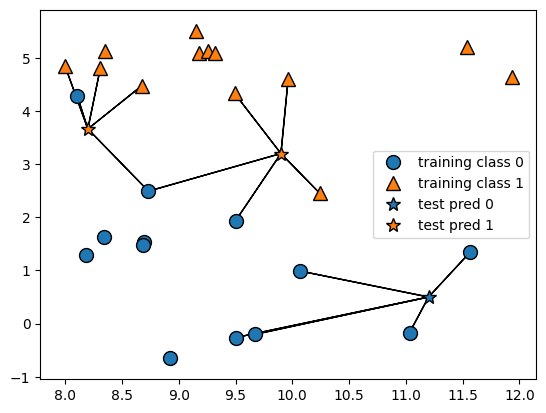

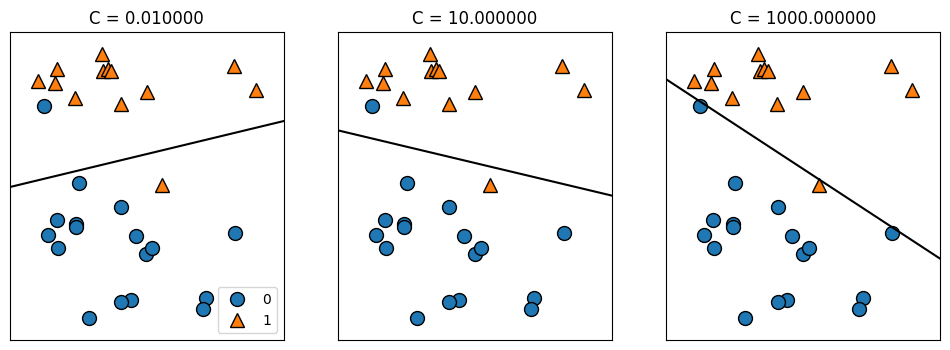

In [30]:
#knn
mglearn.plots.plot_knn_classification(n_neighbors=5) 
#별은 가장 많이 연결된 모양으로 바뀜

#lr
mglearn.plots.plot_linear_svc_regularization()

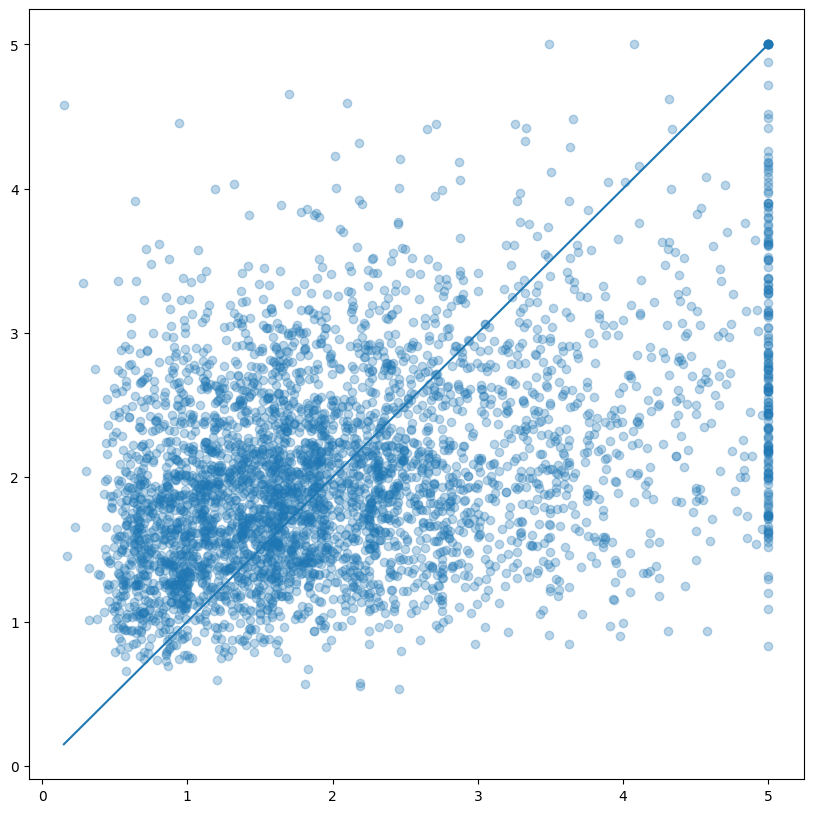

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.gray()
plt.show()

## KNeighborsRegressor

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
X, y = housing['data'], housing['target']
X.shape, y.shape #(569, 30): 569명의 데이터, 30항목의 문진개수(특징) 
                #X, y의 (*, ): *이 같은 숫자여야함

((20640, 8), (20640,))

``` 
knn은 짝수는 절대 안쓴다
컴퓨터에서 선택을 해야할 때, 소수 > 홀수
```

In [5]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)# 보통 3으로 잡음
knn.fit(X_train, y_train) # knn학습

KNeighborsRegressor(n_neighbors=3)

In [8]:
from sklearn.metrics import mean_squared_error
y_pred = knn.predict(X_test) 
print(mean_squared_error(y_test, y_pred)) 

1.1694144088518572


```
[나이브 베이즈 분류(Naive Bayes) ]
    - 예측이 굉장히 빠름(학습이 빠른건 아님) <- 사전에 정리되어 있으니까
    - 파라미터에 비교적 둔감
    - '고차원 희소 데이터에 잘 작동' #아마존 판매상품 데이터: 많은 상품중에 고객1이 산 물건은 1, 2개
    - 단점: 선형 모델보다 '항상' 낮은 성능
    - 조건부 확률
```

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score

In [ ]:
cancer = load_breast_cancer()
X, y = cancer['data'], cancer['target']
#X.shape, y.shape

((569, 30), (569,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [26]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [27]:
y_pred = gnb.predict(X_test)
print(gnb.score(X_test, y_test))

0.958041958041958


# 회귀